## Stock market prediction and forecasting using LSTM by Ganesh Masurkar

#### STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [6]:
### Data Collection
import pandas_datareader as pdr
key=""

In [2]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [3]:
df=pd.read_csv('MSFT.csv')

In [4]:
df.head()

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982    47894400

In [5]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
9078  2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
9079  2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
9080  2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
9081  2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
9082  2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

        Volume  
9078  43317000  
9079  28351200  
9080  27599700  
9081  25715400  
9082  24446900

### STEP 2 : GATHERING INSIGHTS

In [7]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (9083, 7)


In [8]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [9]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  9083.000000  9083.000000  9083.000000  9083.000000  9083.000000   
mean     41.324936    41.760887    40.878488    41.335628    36.256120   
std      59.696905    60.272218    59.081728    59.714567    59.981436   
min       0.088542     0.092014     0.088542     0.090278     0.057046   
25%       4.050781     4.102051     4.027344     4.075195     2.575089   
50%      26.820000    27.100000    26.520000    26.840000    18.948530   
75%      40.034999    40.443751    39.500000    39.937500    29.244812   
max     344.619995   349.670013   342.200012   343.109985   342.402008   

             Volume  
count  9.083000e+03  
mean   5.875055e+07  
std    3.845200e+07  
min    2.304000e+06  
25%    3.461230e+07  
50%    5.203200e+07  
75%    7.265400e+07  
max    1.031789e+09

In [10]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Here you can see no null values in the dataset

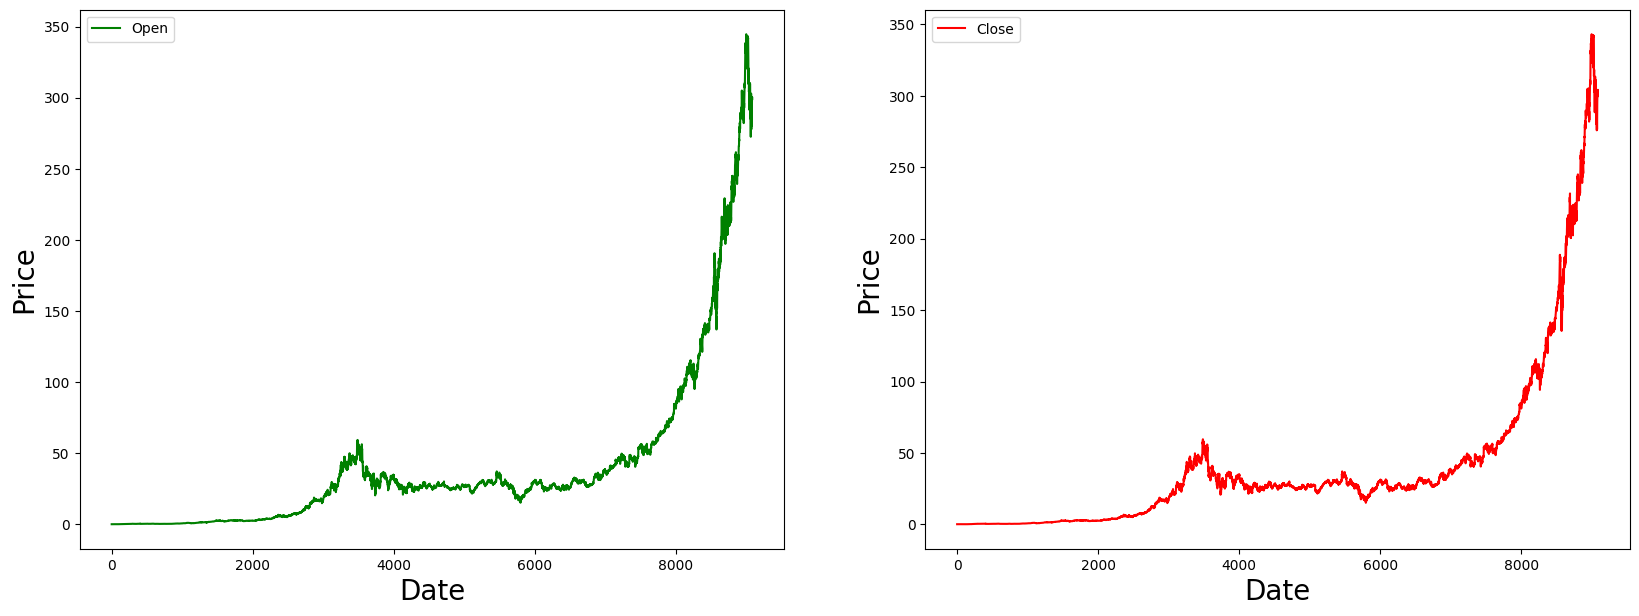

In [11]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=20)
ax[0].set_ylabel('Price',size=20)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=20)
ax[1].set_ylabel('Price',size=20)
ax[1].legend()

fig.show()

#### mplfinance us for candlestick chart

In [12]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


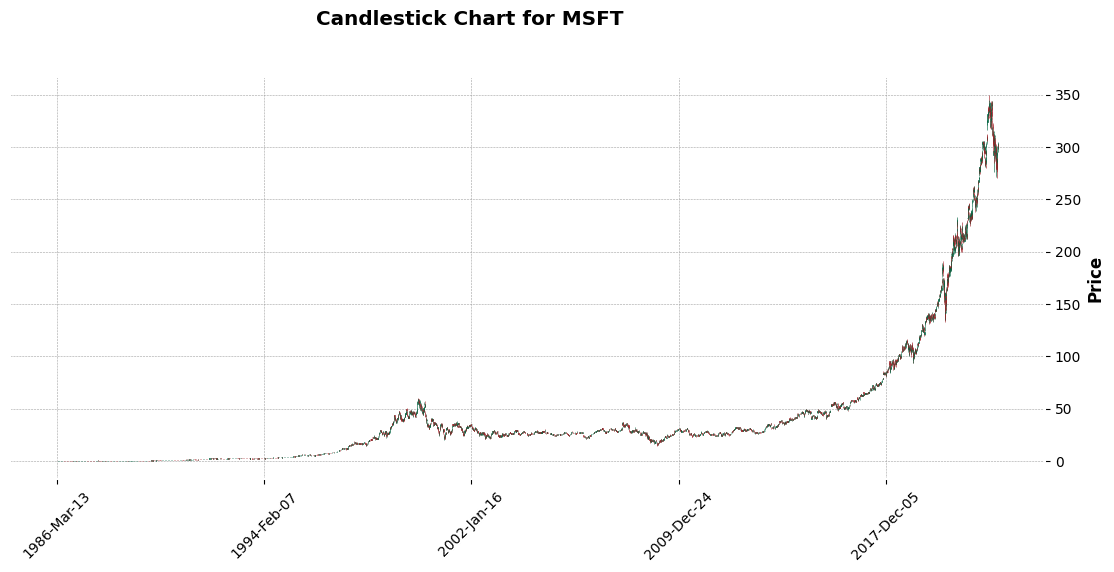

In [15]:
import pandas as pd
import mplfinance as mpf

# Load your DataFrame
df = pd.read_csv('MSFT.csv')

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create a new column 'Color' based on the price movement
df['Color'] = 'g'  # Default to green
df.loc[df['Close'] < df['Open'], 'Color'] = 'r'  # Change to red when close < open

# Plot the candlestick-like chart
mpf.plot(df, type='candle', style='charles', title='Candlestick Chart for MSFT', ylabel='Price', figratio=(10, 4), warn_too_much_data=999999)



In [16]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

6812

In [17]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((6812, 7), (2271, 7))

In [18]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [19]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((6762, 50, 7), (6762, 7), (2221, 50, 7), (2221, 7))

### Data Preprocessing:

In [20]:
data = df[['Close']].values.astype(float)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [8.86158182e-01],
       [8.72835309e-01],
       [8.86274817e-01]])

### STEP 4 : CREATING LSTM MODEL

In [21]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 31902 (124.62 KB)
Trainable params: 31902 (124.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Split Data into Train and Test Sets:

In [22]:

train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

### Create Sequences for LSTM:

In [24]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [25]:
X_train

array([[[2.02437349e-05],
        [3.03656023e-05],
        [3.54294513e-05],
        ...,
        [0.00000000e+00],
        [5.06093371e-06],
        [1.26523343e-05]],

       [[3.03656023e-05],
        [3.54294513e-05],
        [2.78351354e-05],
        ...,
        [5.06093371e-06],
        [1.26523343e-05],
        [1.77132680e-05]],

       [[3.54294513e-05],
        [2.78351354e-05],
        [2.27742017e-05],
        ...,
        [1.26523343e-05],
        [1.77132680e-05],
        [1.51828011e-05]],

       ...,

       [[1.33081928e-01],
        [1.38271129e-01],
        [1.38679268e-01],
        ...,
        [1.38067062e-01],
        [1.36813486e-01],
        [1.35151777e-01]],

       [[1.38271129e-01],
        [1.38679268e-01],
        [1.39612159e-01],
        ...,
        [1.36813486e-01],
        [1.35151777e-01],
        [1.36055507e-01]],

       [[1.38679268e-01],
        [1.39612159e-01],
        [1.40982346e-01],
        ...,
        [1.35151777e-01],
        [1.3605

In [26]:
y_train

array([[1.77132680e-05],
       [1.51828011e-05],
       [1.26523343e-05],
       ...,
       [1.36055507e-01],
       [1.34801946e-01],
       [1.32819553e-01]])

In [27]:

y_test

array([[0.13713417],
       [0.13727993],
       [0.13678433],
       ...,
       [0.88615818],
       [0.87283531],
       [0.88627482]])

### Build and Train LSTM Model:

In [30]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [31]:
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, 1)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
114/114 [==============================] - 4s 6ms/step - loss: 3.3590e-04
Epoch 2/100
114/114 [==============================] - 1s 6ms/step - loss: 8.1879e-06
Epoch 3/100
114/114 [==============================] - 1s 6ms/step - loss: 8.5524e-06
Epoch 4/100
114/114 [==============================] - 1s 6ms/step - loss: 8.1972e-06
Epoch 5/100
114/114 [==============================] - 1s 6ms/step - loss: 7.8917e-06
Epoch 6/100
114/114 [==============================] - 1s 6ms/step - loss: 8.1222e-06
Epoch 7/100
114/114 [==============================] - 1s 7ms/step - loss: 7.7842e-06
Epoch 8/100
114/114 [==============================] - 1s 7ms/step - loss: 7.5102e-06
Epoch 9/100
114/114 [==============================] - 1s 6ms/step - loss: 7.5866e-06
Epoch 10/100
114/114 [==============================] - 1s 6ms/step - loss: 7.3469e-06
Epoch 11/100
114/114 [==============================] - 1s 6ms/step - loss: 7.4883e-06
Epoch 12/100
114/114 [==============================

### Make Predictions:

In [32]:
predicted = model.predict(X_test)

57/57 [==============================] - 1s 2ms/step


### Inverse Transformations:

In [33]:
# If you scaled your data, you can inverse transform the predictions
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

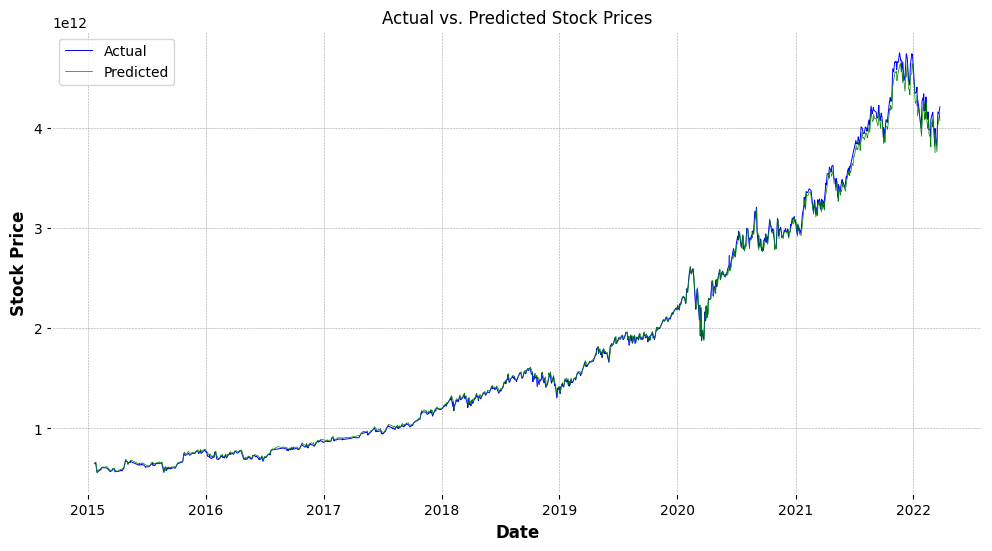

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the model and made predictions
# 'predicted' contains the predicted stock prices, and 'y_test' contains the actual stock prices

# Inverse transform the predictions and actual values if you previously scaled the data
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()}, index=df.index[-len(y_test):])

# Plot the actual vs. predicted data with thinner lines
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Actual'], label='Actual', color='blue', linewidth=0.7)
plt.plot(df_predicted.index, df_predicted['Predicted'], label='Predicted', color='green', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

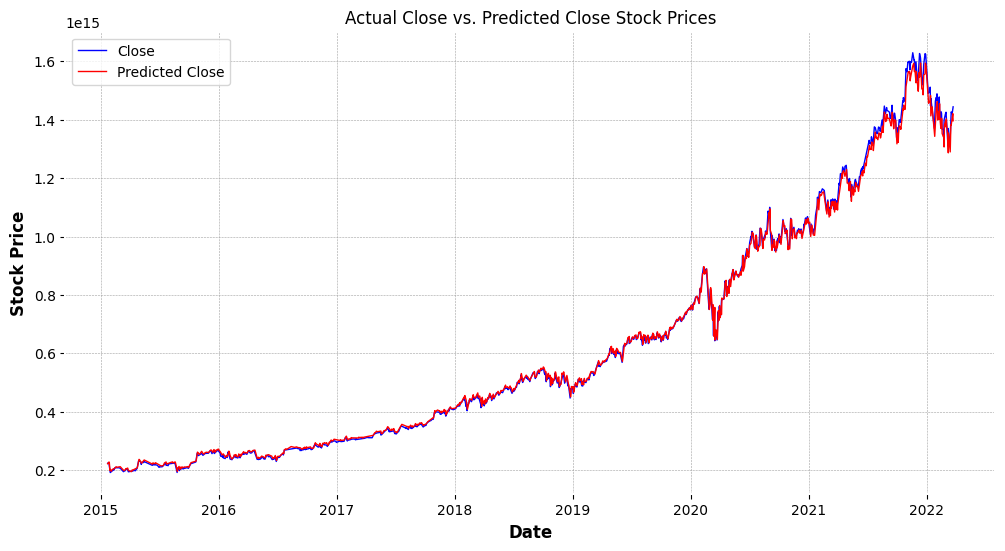

In [38]:
# Inverse transform the predictions and actual values if you previously scaled the data
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Close': y_test.flatten(), 'Predicted Close': predicted.flatten()}, index=df.index[-len(y_test):])

# Plot the actual 'Close' and 'Predicted Close' data with blue and red lines, respectively
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Close'], label='Close', color='blue', linewidth=1)
plt.plot(df_predicted.index, df_predicted['Predicted Close'], label='Predicted Close', color='red', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close vs. Predicted Close Stock Prices')

plt.legend()
plt.show()

In [39]:
len(data)

9083

Epoch 1/100
114/114 [==============================] - 5s 6ms/step - loss: 2.9041e-04
Epoch 2/100
114/114 [==============================] - 1s 6ms/step - loss: 7.2172e-06
Epoch 3/100
114/114 [==============================] - 1s 7ms/step - loss: 7.2845e-06
Epoch 4/100
114/114 [==============================] - 1s 10ms/step - loss: 7.2764e-06
Epoch 5/100
114/114 [==============================] - 1s 8ms/step - loss: 7.3649e-06
Epoch 6/100
114/114 [==============================] - 1s 7ms/step - loss: 7.1052e-06
Epoch 7/100
114/114 [==============================] - 1s 7ms/step - loss: 6.8773e-06
Epoch 8/100
114/114 [==============================] - 1s 7ms/step - loss: 7.1830e-06
Epoch 9/100
114/114 [==============================] - 1s 7ms/step - loss: 6.9167e-06
Epoch 10/100
114/114 [==============================] - 1s 6ms/step - loss: 6.6116e-06
Epoch 11/100
114/114 [==============================] - 1s 6ms/step - loss: 6.5090e-06
Epoch 12/100
114/114 [=============================

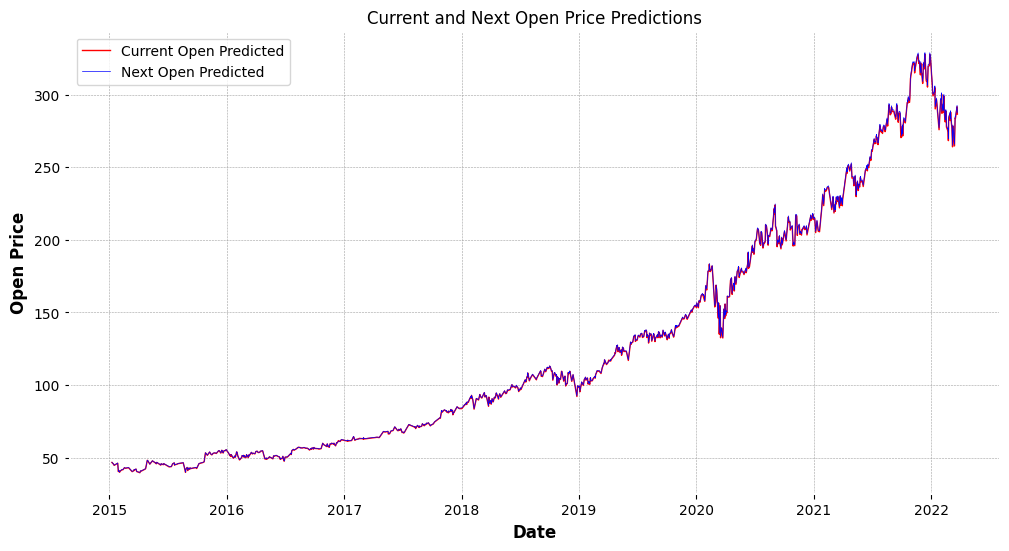

In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Assuming you have loaded your data and performed preprocessing as before
# ...

# Define the sequence length and number of features
sequence_length = 10  # You can adjust this value
num_features = 1  # Assuming you are using only the 'Open' price as a feature

# Create sequences for the LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length:i + sequence_length + 1])
    return np.array(X), np.array(y)

X, y = create_sequences(data, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(2)  # Two output neurons: one for the current open price and one for the next open price
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions
predicted = scaler.inverse_transform(predicted)

# Separate the predictions into current and next open prices
current_open_predictions = predicted[:, 0]
next_open_predictions = predicted[:, 1]

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Current Open Predicted': current_open_predictions, 'Next Open Predicted': next_open_predictions}, index=df.index[-len(current_open_predictions):])

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Current Open Predicted'], label='Current Open Predicted', color='red', linewidth=1)
plt.plot(df_predicted.index, df_predicted['Next Open Predicted'], label='Next Open Predicted', color='blue', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Current and Next Open Price Predictions')
plt.legend()
plt.show()